### NYC NY taxi data EDA

- Q1:Call numbers per hours?
- Q2:Call numbers per weekdays?
- Use GCP Bigquery, data visualization (seaborn, plotly)

In [3]:
# !pip3 install chart-studio cufflinks pandas numpy seaborn matplotlib pandas-gbq

     |████████████████████████████████| 64 kB 496 kB/s eta 0:00:01


You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import chart_studio.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.3


### 1. Whole trip numbers in January

In [2]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '~/.config/gcloud/application_default_credentials.json'

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/workspace/AI_Data_Science/mobility-285808-aa8e44818175.json'

In [4]:
# import GCP Client library
from google.cloud import bigquery

In [5]:
#instantiate a client for bigquery service
bigquery_client = bigquery.Client()
bigquery_client

In [7]:
# Query for Bigquery
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

In [9]:
# run query and get data from bigquery
query_job = bigquery_client.query(query) #API request

In [10]:
# data into dataframe
df = query_job.to_dataframe()
df.head(100)

,pickup_hour,cnt
0,2001-01-01 00:00:00,10
1,2001-01-01 22:00:00,2
2,2001-01-05 11:00:00,1
3,2001-01-06 06:00:00,1
4,2003-01-01 00:00:00,13
...,...,...
95,2018-01-03 12:00:00,13959
96,2018-01-03 13:00:00,14262
97,2018-01-03 14:00:00,15405
98,2018-01-03 15:00:00,15111


In [11]:
df.tail(10)

,pickup_hour,cnt
804,2019-01-22 22:00:00,4
805,2019-01-23 14:00:00,1
806,2019-01-23 15:00:00,1
807,2019-01-26 03:00:00,2
808,2019-01-29 06:00:00,3
809,2019-01-29 08:00:00,2
810,2019-01-29 09:00:00,1
811,2019-01-29 13:00:00,1
812,2019-01-29 14:00:00,1
813,2019-01-31 14:00:00,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 2 columns):
pickup_hour    814 non-null datetime64[ns]
cnt            814 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.8 KB


In [14]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df

,pickup_hour,cnt
0,2001-01-01 00:00:00,10
1,2001-01-01 22:00:00,2
2,2001-01-05 11:00:00,1
3,2001-01-06 06:00:00,1
4,2003-01-01 00:00:00,13
...,...,...
809,2019-01-29 08:00:00,2
810,2019-01-29 09:00:00,1
811,2019-01-29 13:00:00,1
812,2019-01-29 14:00:00,1


In [15]:
df = df.set_index('pickup_hour')
df

,cnt
pickup_hour,
2001-01-01 00:00:00,10
2001-01-01 22:00:00,2
2001-01-05 11:00:00,1
2001-01-06 06:00:00,1
2003-01-01 00:00:00,13
...,...
2019-01-29 08:00:00,2
2019-01-29 09:00:00,1
2019-01-29 13:00:00,1


In [17]:
df.iplot(kind='scatter', xTitle='Datetimes', yTitle='Demand', title='NYC Taxi Demand')

## number of trips per date

In [21]:
df['date'] = df.index.date
df

,cnt,date
pickup_hour,,
2001-01-01 00:00:00,10,2001-01-01
2001-01-01 22:00:00,2,2001-01-01
2001-01-05 11:00:00,1,2001-01-05
2001-01-06 06:00:00,1,2001-01-06
2003-01-01 00:00:00,13,2003-01-01
...,...,...
2019-01-29 08:00:00,2,2019-01-29
2019-01-29 09:00:00,1,2019-01-29
2019-01-29 13:00:00,1,2019-01-29


In [23]:
df.groupby(['date'])[['cnt']].sum().iplot()

## Trip numbers per weekdays for every hours

In [24]:
df.head()

,cnt,date
pickup_hour,,
2001-01-01 00:00:00,10,2001-01-01
2001-01-01 22:00:00,2,2001-01-01
2001-01-05 11:00:00,1,2001-01-05
2001-01-06 06:00:00,1,2001-01-06
2003-01-01 00:00:00,13,2003-01-01


In [26]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week
df

,cnt,date,weekday,hour,weeknum
pickup_hour,,,,,
2001-01-01 00:00:00,10,2001-01-01,0,0,1
2001-01-01 22:00:00,2,2001-01-01,0,22,1
2001-01-05 11:00:00,1,2001-01-05,4,11,1
2001-01-06 06:00:00,1,2001-01-06,5,6,1
2003-01-01 00:00:00,13,2003-01-01,2,0,1
...,...,...,...,...,...
2019-01-29 08:00:00,2,2019-01-29,1,8,5
2019-01-29 09:00:00,1,2019-01-29,1,9,5
2019-01-29 13:00:00,1,2019-01-29,1,13,5


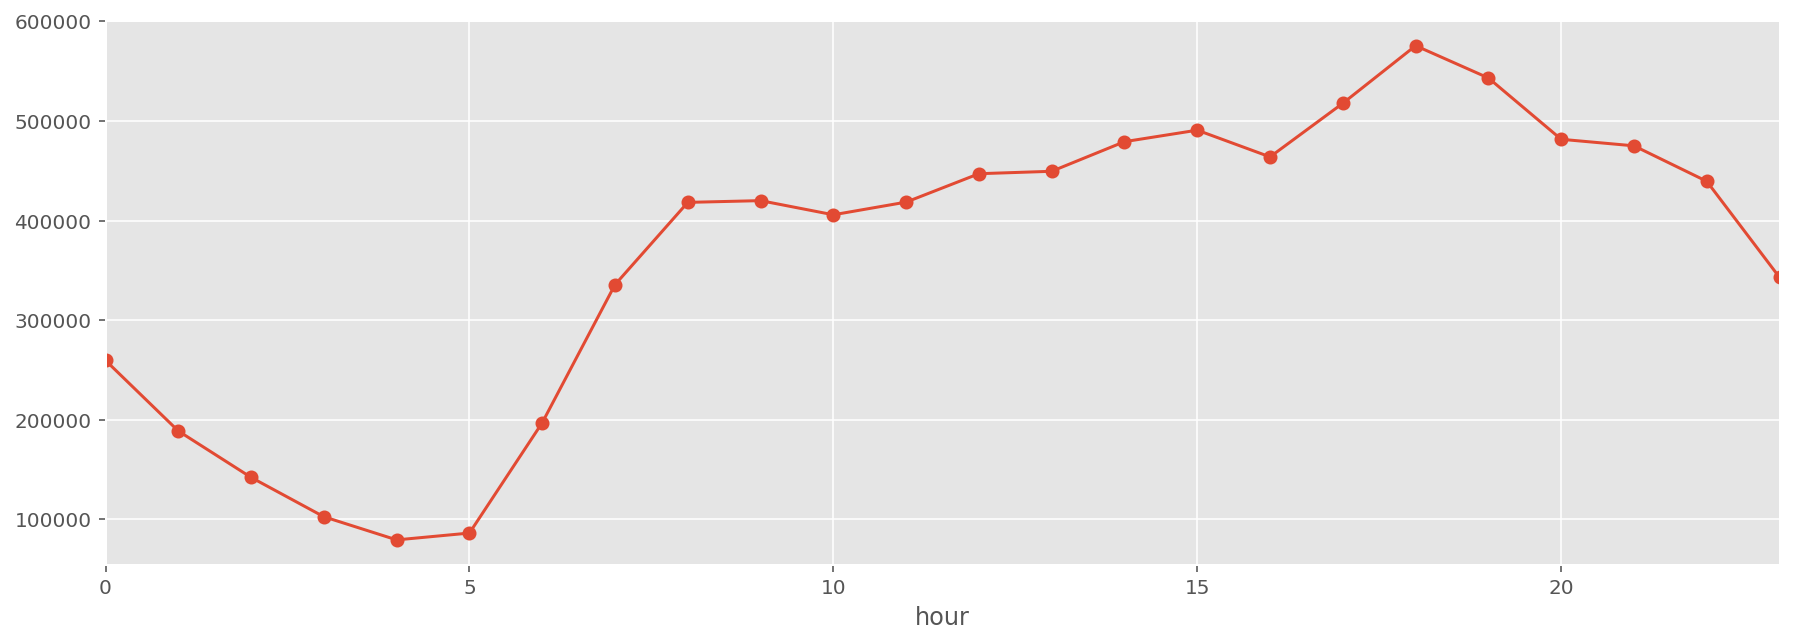

In [32]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y=['cnt'], kind='line', style='-o', figsize=(15,5))

- Pick time : 18 ~ 19 PM
- lowest time : 5 AM

In [30]:
df2= df.groupby('hour')['cnt'].sum()
df2

hour
0     259596
1     188729
2     142119
3     102611
4      79367
5      86229
6     197011
7     335669
8     418310
9     420056
10    405852
11    418578
12    447102
13    449532
14    479266
15    490827
16    463980
17    517837
18    575641
19    543250
20    481664
21    475099
22    439486
23    342980
Name: cnt, dtype: int64

In [33]:
# trip numbers for each hours per weekdays
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()
# Wed, Fri have highest trip numbers

In [34]:
# same as pivot table
df[['cnt', 'hour', 'weekday']].pivot_table('cnt', index='hour', columns='weekday', aggfunc='mean').iplot(kind='scatter')

In [35]:
# bar graph
df.groupby(['weekday'])['cnt'].mean().iplot(kind='bar')

- Friday had a highest trip numbers